# WOC 4.0
>> ### Machine Learning
>>>> ###### IIT(ISM) Dhanabad
>>>> ###### Arushika

## Linear regression

>> ### Training set

In [ ]:
import numpy as np
import matplotlib.pyplot as pp
import pandas as pd

In [ ]:
# Loading dataset 
data = pd.read_csv('Linear_train.csv')
data

,Unnamed: 0,A,B,C,D,E,F,G,H,I,...,L,M,N,O,P,Q,R,S,T,label
0,0,-9.989516,1564.957586,8.199060,32.508797,19.464400,1644.524093,26.100966,34.731954,4378.575414,...,770.535311,30.060441,-25.002361,11.892468,-34.329383,37.218423,-4.440530,29.075092,29.107896,311.232491
1,1,-17.591800,1559.053039,12.302737,-36.351098,6.256406,1640.834263,12.954212,-43.333128,4833.766813,...,997.260070,-1.329145,16.022086,42.972484,-7.372877,45.550946,37.576551,12.926551,-32.565844,6393.112342
2,2,-28.321695,1305.900952,-35.681049,-9.039358,-45.519426,2039.003363,-0.154348,18.107957,4162.395297,...,616.059291,-6.997085,27.846844,26.511376,19.323152,-35.807513,-5.913019,15.046779,-34.332357,2601.046223
3,3,-40.471241,1612.746996,-28.980454,2.137719,-34.767491,2757.469393,23.857472,-48.434183,4340.953927,...,715.537625,-12.441561,47.883435,36.994884,30.783992,22.162383,16.465836,41.435425,33.561233,13572.118106
4,4,-36.525271,1852.275617,-32.744347,-1.439526,-14.061837,2138.422485,44.061988,33.336936,4099.453685,...,629.221442,10.992360,-47.143335,-8.296962,-8.086565,39.169726,-49.540056,-32.518653,-36.320202,-5462.446898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49995,38.882059,1829.766795,-9.597762,42.286077,-45.676532,2340.446842,44.758699,-49.232038,4561.096049,...,931.215587,-19.667192,20.825892,18.055764,-40.074521,44.966776,30.681416,38.376682,33.942225,9034.945727
49996,49996,-29.570690,1467.757407,-2.581269,8.699766,-32.209400,2065.685621,13.244693,-27.154067,4922.613361,...,646.439398,45.407497,-41.574684,-41.278010,34.484129,16.631234,-10.488980,-11.637358,-25.774032,-6345.178110
49997,49997,-26.656483,1081.812179,19.742925,-49.109287,-8.179490,1755.112415,-26.730046,-32.187078,4289.779346,...,950.109763,-1.341077,-33.268738,32.604813,-17.198521,-29.136001,24.609231,11.935784,-35.190456,1483.917022
49998,49998,49.470595,1418.823031,14.854524,-6.995360,27.184947,1235.231487,34.556613,-33.790945,4119.297411,...,742.735044,-48.406474,-4.081799,20.777856,-49.422060,-31.251860,-27.546928,38.121308,-10.588040,10720.139180


In [ ]:
# From the dataset seperating x and y 

# X-matrice is supposed to be a m x (n+1) dimensional matrice
# where n = Number of different features present 
#       m = Number of enteries in each feature
X_1 = data.iloc[:,1:21] # for m x n dimensional 
ones = np.ones([X_1.shape[0],1]) #This is done because for convinience X_0 is considered to have entering of only 1(for simplicity)
X_1 = np.concatenate ((ones , X_1) , axis=1)
# y-matrice is supposed to be a m x 1 dimensional matrice 
y_1 = data.iloc[:,21:22].values
 
# Matrice of theta(coefficient of the features in hypothesis function) is supposed to a 1 x (n+1) dimensional matrice
theta = np.zeros([1,21])

X_2 = data.iloc[:,0:1].values

In [ ]:
X_1 = (X_1 - X_1.mean()) / X_1.std()

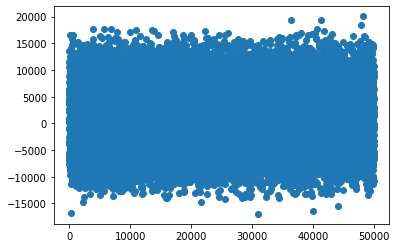

In [ ]:
pp.scatter(X_2,y_1)

In [ ]:
m,n = X_1.shape

In [ ]:
#mean=np.mean(X_1,axis=1).reshape((m,1))
#std=np.std(X_1,axis=1).reshape((m,1))
#X_1=(X_1-mean)/std

`Hypothesis` is:
</br></br>
<b> h(theta)= (theta.T)*X 

To predict matrice of theta, we minimise the `cost function` which is basically minimising the `L2 loss`. 
Which in turn says, the hypothesis closely passes through the output. Hence, Giving us a perfect ground to predict the values further through regression.

In [ ]:
#Defining Cost function
def computeCost(X,y,theta):
    tobesummed = np.power(((X @ theta.T)-y),2)
    return np.sum(tobesummed)/(2 * len(X))

To minimise the cost we use some algorithms. The most basic of all the algorithms but still one of the most important algorithm is that of `Gradient Descent`.This method is somewhat like hit and trial. Here we minimise the value of theta in each iteration. Till the cost funtion stops minimising or the cost funtion's value becomes static. </br>
This minimising of cost function depends on `alpha` which is called the learning rate. There can be different scenerios based on the value of alpha:
* if alpha is very large then the value can overshoot 
* if alpha is very small then it will take infinite no. of iteration to reach the lowest value 

In [ ]:
#Defining gradient descent
def gradientDescent(X,y,theta,iters,alpha):
    cost = np.zeros(iters)
    for i in range(iters):
        theta = theta - (alpha/len(X)) * np.sum(X * (X @ theta.T - y), axis=0)
        cost[i] = computeCost(X, y, theta)
    
    return theta,cost

In [ ]:
# Setting Hyperparameters
#@title Setting Hypermeters:
Alpha = 0.07#@param {type:"slider", min:0, max:1, step:0.0000001}
iters = 100000 #@param {type:"slider", min:200, max:10000000, step:100}
alpha= Alpha

In [ ]:
#running the gd and cost function
g,cost = gradientDescent(X_1,y_1,theta,iters,alpha)
print(g)

finalCost = computeCost(X_1,y_1,g)
print(finalCost)

In [ ]:
g = np.asarray(g)

In [ ]:
y_pred = np.dot(X_1 , g.T)
y_pred

In [ ]:
y_1

In [ ]:
# Calculating the value of RMSE
np.sqrt(np.sum(((y_1-y_pred)**2).mean()))

In [ ]:
#plot the cost
fig, ax = pp.subplots()  
ax.plot(np.arange(iters), cost, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch')

# Test dataset


**Now applying the above obtained coefficients and value of alpha, We plot a graph for the test data set to see if the hypothesis is correct.**

In [ ]:
data_  = pd.read_csv('Linear_test.csv')

In [ ]:
data_

In [ ]:
# From the dataset seperating x and y 

# X-matrice is supposed to be a m x (n+1) dimensional matrice
# where n = Number of different features present 
#       m = Number of enteries in each feature
X_3 = data_.iloc[:,1:21] # for m x n dimensional 
ones = np.ones([X_3.shape[0],1]) #This is done because for convinience X_0 is considered to have entering of only 1(for simplicity)
X_3 = np.concatenate ((ones , X_3) , axis=1)
# y-matrice is supposed to be a m x 1 dimensional matrice 
y_3 = data_.iloc[:,21:22].values

X_4 = data_.iloc[:,0:1].values

In [ ]:
m,n = X_3.shape

In [ ]:
mean=np.mean(X_3,axis=1).reshape((m,1))
std=np.std(X_3,axis=1).reshape((m,1))
X_3=(X_3-mean)/std

In [ ]:
g.shape

In [ ]:
X_3.shape

In [ ]:
y_pred_ = np.dot(X_3 , g.T)
y_pred_

In [ ]:
y_3

In [ ]:
# Calculating the value of RMSE
np.sqrt(np.sum(((y_3-y_pred_)**2).mean()))

4915.5865067642

What is a good RMSE value?

The short answer: `**It depends**.`
<br><br>
The lower the RMSE, the better a given model is able to “fit” a dataset. However, the range of the dataset you’re working with is important in determining whether or not a given RMSE value is “low” or not.
<br><br>
Going by this logic as the value of y_test is small and the rmse is very very small so it shows the model is working well and fits the data well.

As the results of y predicted by the hypothesis function is same as that of the labels given in the dataset. Hence, proved that the linear regression is the perfect choice for the dataset provided.

Text(0.5, 1.0, 'Error vs. Training Epoch')

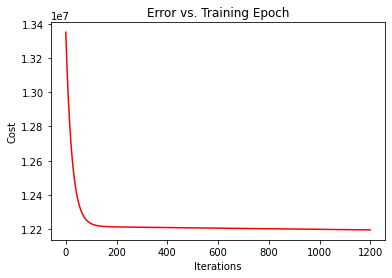

In [ ]:
#plot the cost
fig, ax = pp.subplots()  
ax.plot(np.arange(iters), cost, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch')

# <b> Plotting (Linear Regression)
ploting the datasets training and test 
and then them together.

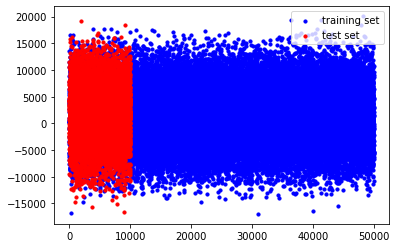

In [ ]:
fig = pp.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(X_2, y_1, s = 10, c = 'b', label = 'training set')
ax1.scatter(X_4, y_3, s = 10, c = 'r', label = 'test set')
pp.legend(loc='upper right');
pp.show()